In [1]:
import numpy as np
from keras.utils import to_categorical
import os
import glob
import cv2 
import math
import dlib
from scipy.linalg import svd
from numpy import linalg as LA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split



%matplotlib inline

Using TensorFlow backend.


In [2]:
path = glob.glob("F:/Program Files/Detected/*.png")

In [3]:
def detect_face(img):
#convert the test image to gray scale as opencv face detector expects gray images
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
#load OpenCV face detector, I am using LBP which is fast
#there is also a more accurate but slow: Haar classifier
    face_cascade = cv2.CascadeClassifier('C:/Users/AAYUSH/Downloads/opencv/sources/data/haarcascades/haarcascade_frontalface_alt.xml')
 
#let's detect multiscale images(some images may be closer to camera than others)
#result is a list of faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5);
 
#if no faces are detected then return original img
    if (len(faces) == 0):
        return None, None
 
#under the assumption that there will be only one face,
#extract the face area
    (x, y, w, h) = faces[0]
 
#return only the face part of the image
    return gray[y:y+w, x:x+h], faces[0]

In [5]:
X=[]
#hogFaceDetector = dlib.get_frontal_face_detector()
for img in path:
    n = cv2.imread(img)
    gray = cv2.cvtColor(n,cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray,(50,50))
    X.append(gray)
    

In [7]:
X= np.array(X)
#len(X)

In [ ]:
#data = pd.read_csv('F:/Program Files/Annotations/Train_Expression.txt', sep=" ", header=None)
#data.columns = ["filename", "expression"]

In [8]:
Y = np.zeros((len(X)))
i = 0
for img in path:
    if "1641002_" in img:
        Y[i]=0
    elif "\1641003_" in img:
        Y[i]=1
    elif "\1641005_" in img:
        Y[i]=2
    elif "1641006_" in img:
        Y[i]=3
    elif "1641007_" in img:
        Y[i]=4
    elif "1641010_" in img:
        Y[i]=5
    elif "1641011_" in img:
        Y[i]=6
    elif "1641013_" in img:
        Y[i]=7
    elif "1641014_" in img:
        Y[i]=8
    elif "1641015_" in img:
        Y[i]=9
    elif "1641016_" in img:
        Y[i]=10
    elif "1641017_" in img:
        Y[i]=11
    elif "1641020_" in img:
        Y[i]=12
    elif "1641021_" in img:
        Y[i]=13
    elif "1641023_" in img:
        Y[i]=14
    elif "1641025_" in img:
        Y[i]=15
    elif "1641026_" in img:
        Y[i]=16
    elif "1641027_" in img:
        Y[i]=17
    elif "1641028_" in img:
        Y[i]=18
    elif "1641029_" in img:
        Y[i]=19
    elif "1641030_" in img:
        Y[i]=20
    elif "1641031_" in img:
        Y[i]=21
    elif "1641034_" in img:
        Y[i]=22
    elif "1641035_" in img:
        Y[i]=23
    elif "1641036_" in img:
        Y[i]=24
    elif "1641038_" in img:
        Y[i]=25
    elif "1641039_" in img:
        Y[i]=26
    elif "1641040_" in img:
        Y[i]=27
    elif "1641043_" in img:
        Y[i]=28
    elif "1641044_" in img:
        Y[i]=29
    elif "1641046_" in img:
        Y[i]=30
    elif "1641047_" in img:
        Y[i]=31
    elif "1641052_" in img:
        Y[i]=32
    elif "1641054_" in img:
        Y[i]=33
    elif "1641055_" in img:
        Y[i]=34
    elif "1641057_" in img:
        Y[i]=35
    elif "1641059_" in img:
        Y[i]=36
    elif "1641060_" in img:
        Y[i]=37
    elif "1641061_" in img:
        Y[i]=38
    elif "1641062_" in img:
        Y[i]=39
    elif "1641065_" in img:
        Y[i]=40
    elif "1641066_" in img:
        Y[i]=41
    elif "1641067_" in img:
        Y[i]=42
    elif "1641068_" in img:
        Y[i]=43
    elif "1641069_" in img:
        Y[i]=44
    elif "1641071_" in img:
        Y[i]=45
    elif "1641072_" in img:
        Y[i]=46
    elif "1641073_" in img:
        Y[i]=47
    elif "1844001_" in img:
        Y[i]=48
    elif "1844002_" in img:
        Y[i]=49
    elif "1844004_" in img:
        Y[i]=50
    elif "1844005_" in img:
        Y[i]=51
    elif "1844006_" in img:
        Y[i]=52
    elif "1844007_" in img:
        Y[i]=53
    elif "1844008_" in img:
        Y[i]=54
    elif "1844010_" in img:
        Y[i]=55
    elif "1849011_" in img:
        Y[i]=56
    elif "1849012_" in img:
        Y[i]=57
    elif "1849013_" in img:
        Y[i]=58
    elif "201501103_" in img:
        Y[i]=59
    i = i+1


In [9]:
Y

array([ 0.,  0.,  0., ..., 59., 59., 59.])

In [10]:
Y_one_hot = to_categorical(Y)

In [11]:
Y_one_hot,Y

(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]], dtype=float32),
 array([ 0.,  0.,  0., ..., 59., 59., 59.]))

In [12]:
X = X.astype('float32')
X = X / 255


X = X.reshape(-1,50,50, 1)

In [13]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X, Y_one_hot, test_size=0.1, random_state=13)
train_X.shape,test_X.shape,train_Y.shape,test_Y.shape

((4622, 50, 50, 1), (514, 50, 50, 1), (4622, 60), (514, 60))

In [14]:
train_X,valid_X,train_Y,valid_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_Y.shape,valid_Y.shape

((3697, 50, 50, 1), (925, 50, 50, 1), (3697, 60), (925, 60))

In [15]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [16]:
batch_size = 128
epochs = 20
num_classes = 60

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='valid',input_shape=(50,50,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='valid'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='valid'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='valid'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
__________

In [20]:
model_train = model.fit(train_X, train_Y, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_Y))

Instructions for updating:
Use tf.cast instead.
Train on 3697 samples, validate on 925 samples
Epoch 1/20
3697/3697 [==============================] - 17s 5ms/step - loss: 4.0774 - acc: 0.0633 - val_loss: 4.0673 - val_acc: 0.0757

In [21]:
model.save("CNN_model.h5")

In [22]:
test_eval = model.evaluate(test_X, test_Y, verbose=1)

514/514 [==============================] - 1s 1ms/step


In [23]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.14373024576253002
Test accuracy: 0.9688715953307393


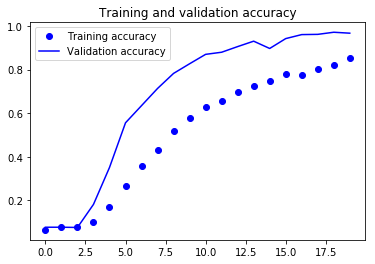

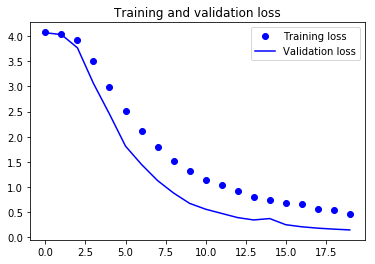

In [24]:
accuracy = model_train.history['acc']
val_accuracy = model_train.history['val_acc']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [25]:
predicted_classes = model.predict(test_X)

In [26]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [27]:
test_Y = np.argmax(np.round(test_Y),axis=1)

In [28]:
predicted_classes.shape, test_Y.shape

((514,), (514,))

Found 488 correct labels


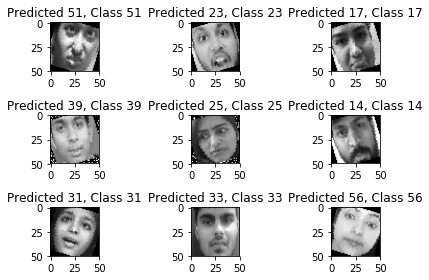

In [32]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[50:59]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(50,50), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 26 incorrect labels


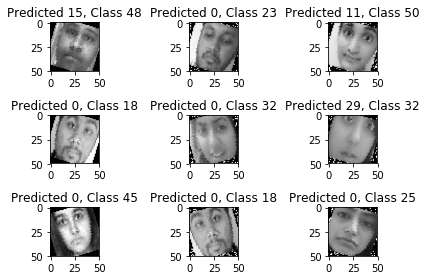

In [30]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(50,50), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [31]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))
 

             precision    recall  f1-score   support

    Class 0       0.65      1.00      0.79        33
    Class 1       1.00      1.00      1.00         6
    Class 2       1.00      0.88      0.93         8
    Class 3       1.00      1.00      1.00         6
    Class 4       1.00      0.75      0.86         4
    Class 5       1.00      1.00      1.00         4
    Class 6       1.00      1.00      1.00        10
    Class 7       1.00      1.00      1.00        16
    Class 8       1.00      0.62      0.77         8
    Class 9       0.89      1.00      0.94         8
   Class 10       1.00      1.00      1.00        10
   Class 11       1.00      1.00      1.00        14
   Class 12       0.92      1.00      0.96        12
   Class 13       0.86      1.00      0.92         6
   Class 14       1.00      0.83      0.91        12
   Class 15       1.00      1.00      1.00         7
   Class 16       1.00      0.57      0.73         7
   Class 17       1.00      1.00      1.00   